In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from __future__ import division, print_function, unicode_literals

In [69]:
import pandas as pd
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.2


In [90]:
train = pd.read_csv("train.csv.bz2")
test = pd.read_csv("test.csv.bz2")

In [91]:
X_train = train.drop("subject", axis=1).drop("Activity", axis=1)
y_train = train["Activity"]


X_test = test.drop("subject", axis=1).drop("Activity", axis=1)
y_test = test["Activity"]

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import numpy as np

In [95]:
p = PCA()
p.fit(X_train)

print(np.sum(p.explained_variance_ratio_[:100]))

0.9489150399379713


### Train the model

In [96]:
%%timeit

p = PCA(n_components = 102)

X_train_transformed = p.fit_transform(X_train)
X_test_transformed = p.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)

print(clf.score(X_test_transformed, y_test))

0.9324737020699015
0.9324737020699015
0.9324737020699015
0.9324737020699015
0.9324737020699015
0.9324737020699015
0.9324737020699015
0.9324737020699015
301 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


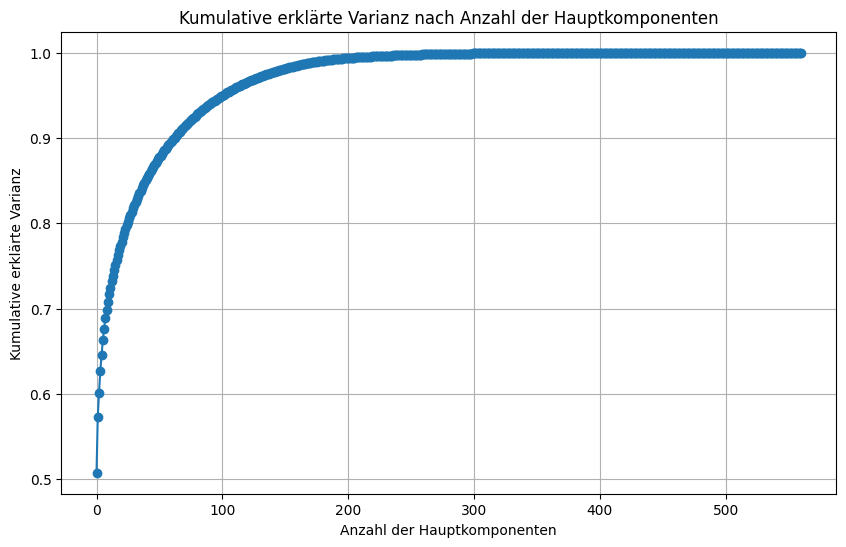

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(p.explained_variance_ratio_), marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz nach Anzahl der Hauptkomponenten')
plt.grid(True)
plt.show()


In [98]:
# Angenommen, X_train ist dein Trainingsdatensatz
p = PCA()
p.fit(X_train)

# Die Anteile der erklärten Varianz jeder Hauptkomponente
explained_variance_ratios = p.explained_variance_ratio_

# Kumulierte Varianz berechnen
cumulative_variance = np.cumsum(explained_variance_ratios)

# Anzahl der Hauptkomponenten wählen, die einen bestimmten Schwellenwert der Varianz erklären
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Anzahl der Hauptkomponenten, die 95% der Varianz erklären: {n_components}')

# PCA mit der gewählten Anzahl an Komponenten erneut durchführen
p = PCA(n_components=n_components)
X_train_reduced = p.fit_transform(X_train)
X_test_reduced = p.transform(X_test)

# Die reduzierten Daten für das Training deines Modells verwenden
clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)

print(clf.score(X_test_reduced, y_test))

Anzahl der Hauptkomponenten, die 95% der Varianz erklären: 102
0.9324737020699015


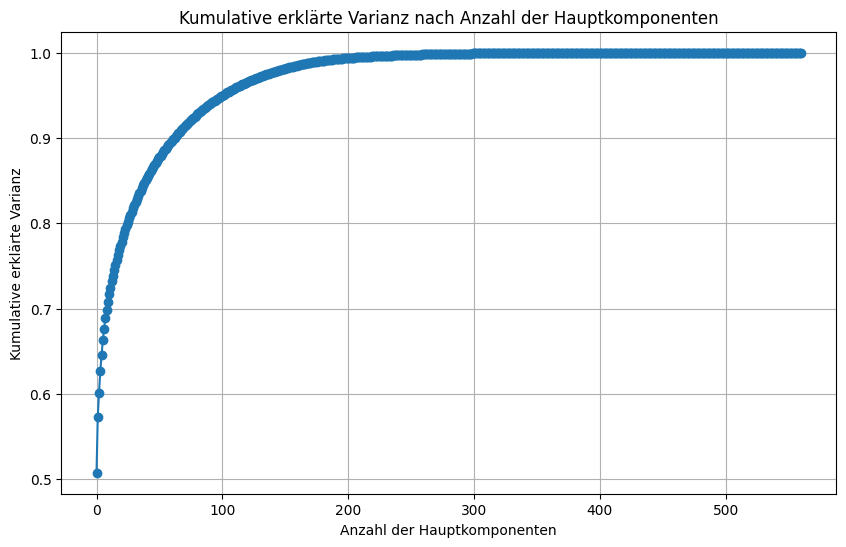

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz nach Anzahl der Hauptkomponenten')
plt.grid(True)
plt.show()
